# Processing of SCIP features

SCIP features have been computed on EhV data form the first large scale experiment, on files: H1_T7, H1_T8, H1_T9, H2_T7, H2_T8, H2_T9

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load common_.py
from common import *

In [4]:
import math
import tifffile
import pyarrow.parquet as pq
from matplotlib.patches import Rectangle

## SCIP computed features

In [5]:
channel_boundaries = pandas.read_csv("/vsc-mounts/gent-user/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/v2/results/202110271339/channel_boundaries.csv", index_col=0)
channel_boundaries.index = channel_boundaries.index.astype(str)

In [6]:
channel_boundaries

,Ch1_min,Ch1_max,Ch2_min,Ch2_max,Ch3_min,Ch3_max,Ch4_min,Ch4_max,Ch5_min,Ch5_max,Ch6_min,Ch6_max,Ch7_min,Ch7_max
0,163.0,1480.0,18.0,154.0,0.0,78.0,0.0,4087.0,0.0,2238.0,179.0,1774.0,0.0,3735.0
1,130.0,2393.0,20.0,399.0,0.0,80.0,0.0,4090.0,0.0,1287.0,143.0,2427.0,0.0,3611.0
2,178.0,1512.0,19.0,1895.0,0.0,93.0,0.0,4085.0,0.0,2575.0,190.0,2875.0,0.0,3337.0
3,220.0,1939.0,24.0,1424.0,0.0,245.0,0.0,4087.0,0.0,2228.0,185.0,2482.0,0.0,3714.0
4,212.0,1782.0,25.0,1115.0,0.0,114.0,0.0,4085.0,0.0,2174.0,181.0,2396.0,0.0,2232.0
5,155.0,1722.0,20.0,1415.0,0.0,147.0,0.0,4087.0,0.0,2546.0,156.0,2375.0,0.0,3939.0
6,221.0,2050.0,24.0,1379.0,0.0,124.0,0.0,4086.0,0.0,2752.0,191.0,3590.0,0.0,3908.0
7,262.0,2004.0,22.0,1256.0,0.0,145.0,0.0,4085.0,0.0,2484.0,184.0,1845.0,0.0,1204.0
8,214.0,1534.0,26.0,870.0,0.0,106.0,6.0,4084.0,0.0,2923.0,202.0,2042.0,0.0,1243.0
9,221.0,1482.0,24.0,394.0,0.0,65.0,16.0,4087.0,27.0,1484.0,215.0,1513.0,0.0,319.0


In [74]:
df = pq.read_table("/vsc-mounts/gent-user/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/v2/results/202110252052/features.parquet").to_pandas()

In [75]:
df.shape

(76063, 618)

In [76]:
nanrows = df[df["meta_bbox_maxc"].isna()]
nanrows.shape

(14858, 618)

In [77]:
df = df[~df["meta_bbox_maxc"].isna()]
df.shape

(61205, 618)

In [78]:
channels = [1, 3, 4, 6, 9, 11]

In [110]:
def draw_image(row):
    tp = row["meta_group"]
    pixels = tifffile.imread([row[f"meta_{c}"] for c in channels])
    fig, axes = plt.subplots(1, len(pixels))
    minr, minc, maxr, maxc = tuple([int(i) for i in row.filter(regex="bbox")])
    for p, ax, c in zip(pixels, axes, channels):
        
        c_idx = channels.index(c)+1
        norm = Normalize(
            vmin=channel_boundaries.loc[tp][f"Ch{c_idx}_min"],
            vmax=channel_boundaries.loc[tp][f"Ch{c_idx}_max"]
        )
        ax.imshow(p[minr:maxr, minc:maxc], norm=norm, cmap="gray")
        ax.set_axis_off()

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


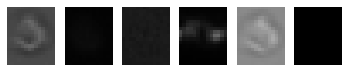

In [120]:
draw_image(df[(df["meta_group"] == "3") & (df["meta_type"] == "Inf")].iloc[0])

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


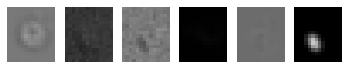

In [112]:
draw_image(df.iloc[1])

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


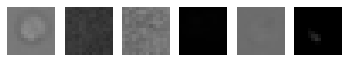

In [113]:
draw_image(df.iloc[2])

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


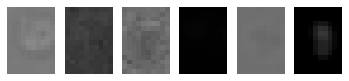

In [114]:
draw_image(df.iloc[3])

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


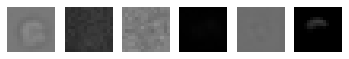

In [115]:
draw_image(df.iloc[5])

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


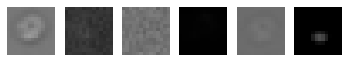

In [116]:
draw_image(df.iloc[6])

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


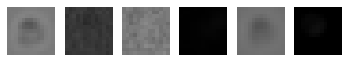

In [117]:
draw_image(df.iloc[7])